In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTANDO LOS DATOS

In [2]:
#Importando la Segunda hoja de Excel
data= pd.read_excel("Documentacion_DRP.xlsx", sheet_name="ComeRico")

## EXPLORANDO LOS DATOS

In [3]:
data.head(3)

,MS,Tier,Equipo,Vertical,DRP,Prueba DRP
0,acf-charges,T1,acf,Core,Si,Si
1,acf-charges,T1,acf,shops,No,NaN
2,acf-charges,T1,cpgs-usr-app-bck-team,shops,No,NaN


In [4]:
#data["MS"].value_counts() #Los rangos son muy bajos para hallar frecuencias o Tops NO GRAFICABLE
#data["Tier"].value_counts() #Graficable
#data["Equipo"].value_counts() # Se puede hacer un Top10
#data["Vertical"].value_counts() #Se puede hacer Top10
#data["DRP"].value_counts()
#data["Prueba DRP"].value_counts()

--------

## TIER

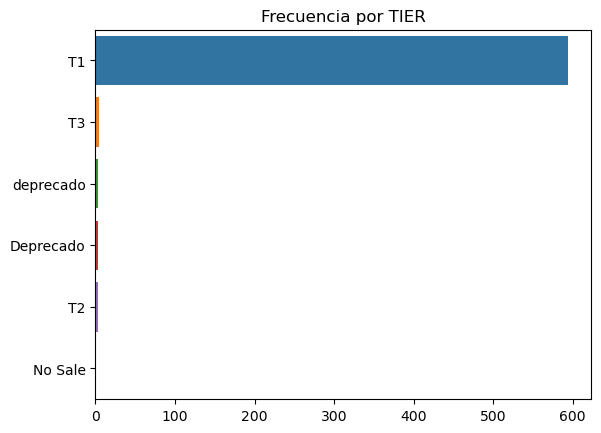

In [5]:
sns.countplot(data=data, y="Tier", 
              order = data["Tier"].value_counts().index,)
sns.set_palette("Set2")
plt.title("Frecuencia por TIER")
plt.xlabel("")
plt.ylabel(None)
plt.show()

---------------

## Areas

In [6]:
#Seleccionando datos Areas sin DRP
datos = data[data["DRP"]=="No"][["Vertical","DRP"]]
#datos

## Areas sin DRP

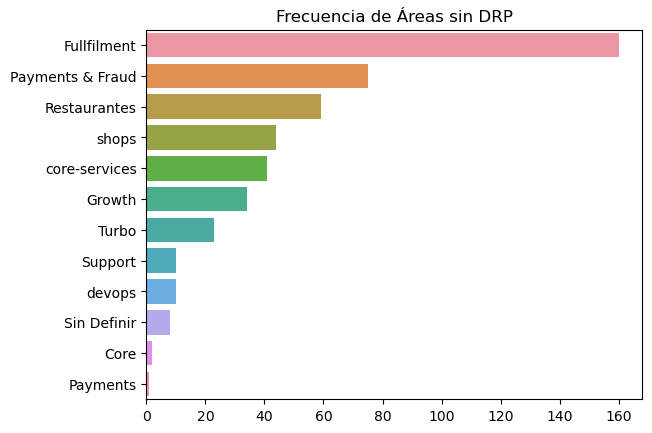

In [7]:

sns.countplot(data=datos, y="Vertical", 
              order = datos["Vertical"].value_counts().index,)
plt.title("Frecuencia de Áreas sin DRP")
plt.xlabel("")
plt.ylabel(None)
plt.show()

## Equipos sin DRP

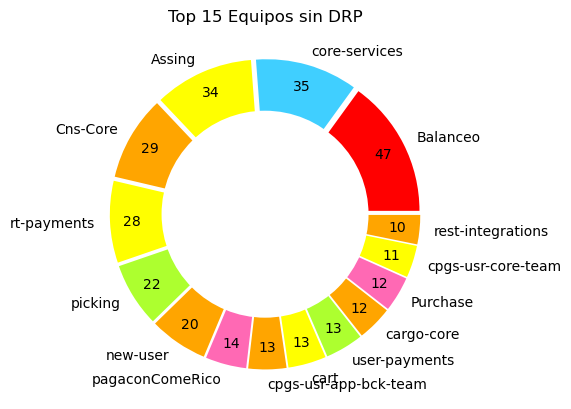

In [8]:
frecuencias = data[data["DRP"]=="No"]["Equipo"].value_counts()[0:15]
etiquetas=["Balanceo","core-services","Assing","Cns-Core","rt-payments",
          "picking", "new-user", "pagaconComeRico", "cpgs-usr-app-bck-team", "cart",
          "user-payments", "cargo-core", "Purchase", "cpgs-usr-core-team", "rest-integrations"]

##GRAFICO DE ANILLOS

#Datos
  
# configuraciones
colors = ['#FF0000', '#40cfff', '#FFFF00','#FFA500',"#FFFF00", 
          '#ADFF2F', '#FFA500', '#ff69b4', "#FFA500", '#FFFF00',
         '#ADFF2F', '#FFA500', '#ff69b4', '#FFFF00', '#FFA500']
explode = (0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05)

#Funcion para mostrar
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{next(gen)}"

counts=frecuencias

# Grafico de Pastel
plt.pie(frecuencias, colors=colors, labels=etiquetas,
        autopct=autopct_fun(counts), pctdistance=0.85,
        explode=explode,labeldistance=1.1)
  
# Agregando el circulo Blanco en la Mitad
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 15 Equipos sin DRP')
plt.show()

## Comparación Pocesos con DRP y pruebas

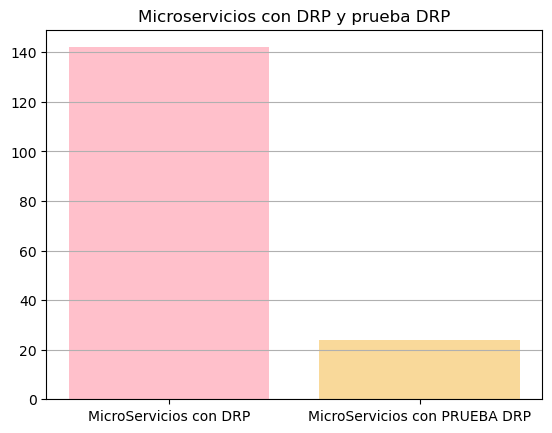

In [15]:
drp = data[data["DRP"]=="Si"].shape[0]
pruebaDRP = data[data["Prueba DRP"]=="Si"].shape[0]

etiquetas = ["MicroServicios con DRP", "MicroServicios con PRUEBA DRP"]

fig, ax = plt.subplots()
ax.bar(etiquetas, [drp, pruebaDRP], color=["#FFC0CB","#f9d99a"])
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.title("Microservicios con DRP y prueba DRP")
plt.show()

In [10]:
data["Prueba DRP"].value_counts()

Si    24
Name: Prueba DRP, dtype: int64

## Comparación Pocesos SIN DRP y Con prueba DRP

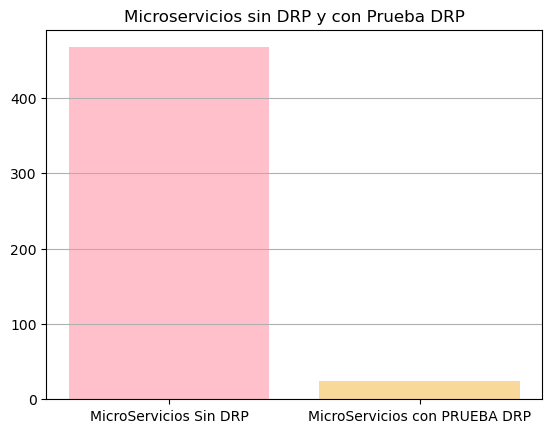

In [16]:
#Revisar si es posible esta combinación
drp = data[data["DRP"]=="No"].shape[0]
pruebaDRP = data[data["Prueba DRP"]=="Si"].shape[0]

etiquetas = ["MicroServicios Sin DRP", "MicroServicios con PRUEBA DRP"]

fig, ax = plt.subplots()
ax.bar(etiquetas, [drp, pruebaDRP], color=["#FFC0CB","#f9d99a"])
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.title("Microservicios sin DRP y con Prueba DRP")
plt.show()